In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Company = pd.read_excel("Company_Data2015-1.xlsx")

In [3]:
Company.head()

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [4]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth Next Year                   3586 non-null   float64
 3   Equity Paid Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital Employed                     3586 non-null   float64
 6   Total Debt                           3586 non-null   float64
 7   Gross Block                          3586 non-null   float64
 8   Net Working Capital                  3586 non-null   float64
 9   Current Assets                       3586 non-null   float64
 10  Current Liabilities and Provisions   3586 non-null   float64
 11  Total Assets/Liabilities      

In [5]:
Company.columns = Company.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/','_by_').str.replace('&','and').str.replace('-','_').str.replace('[','_').str.replace(']','')

In [6]:
Company.head()

,Co_Code,Co_Name,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05


In [7]:
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 3586 
The number of columns (variables) is 67


In [8]:
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_by_Liabilities   

In [9]:
Company.duplicated().sum()

0

In [10]:
Company.drop(['Co_Code','Co_Name'], axis = 1, inplace = True)

In [11]:
Company.describe()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
count,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,3586.000000,...,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000,3586.000000,3.586000e+03,3483.000000,3586.000000,3586.000000
mean,725.045251,62.966584,649.746299,2799.611054,1994.823779,594.178829,410.809665,1960.349172,391.992078,1778.453751,...,-51.162890,-109.213414,-311.570357,-307.005632,-365.056187,603.894032,2.057855e+03,79.644559,0.819757,61.884548
std,4769.681004,778.761744,4091.988792,26975.135385,23652.842746,4871.547802,6301.218546,22577.570829,2675.001631,11437.574690,...,1795.131025,3057.635870,10921.592639,10676.149629,12500.051387,10636.759580,5.416948e+04,137.847792,1.201400,976.824352
min,-8021.600000,0.000000,-7027.480000,-1824.750000,-0.720000,-41.190000,-13162.420000,-0.910000,-0.230000,-4.510000,...,-78870.450000,-141600.000000,-590500.000000,-572000.000000,-688600.000000,0.000000,0.000000e+00,-199.000000,-0.330000,-61.000000
25%,3.985000,3.750000,3.892500,7.602500,0.030000,0.570000,0.942500,4.000000,0.732500,10.555000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,8.000000e+00,0.000000,0.070000,0.270000
50%,19.015000,8.290000,18.580000,39.090000,7.490000,15.870000,10.145000,24.540000,9.225000,52.010000,...,8.070000,5.230000,4.690000,3.890000,1.590000,49.000000,3.900000e+01,35.000000,0.480000,1.530000
75%,123.802500,19.517500,117.297500,226.605000,72.350000,131.895000,61.175000,135.277500,65.650000,310.540000,...,18.990000,14.290000,14.110000,11.390000,7.410000,106.000000,8.900000e+01,96.000000,1.160000,4.910000
max,111729.100000,42263.460000,81657.350000,714001.250000,652823.810000,128477.590000,223257.560000,721166.000000,83232.980000,254737.220000,...,19233.330000,19195.700000,15640.000000,15640.000000,15266.670000,514721.000000,2.034145e+06,996.000000,17.630000,43404.000000


In [12]:
pd.options.display.float_format = '{:.2f}'.format   

Company.describe()

,Networth_Next_Year,Equity_Paid_Up,Networth,Capital_Employed,Total_Debt,Gross_Block,Net_Working_Capital,Current_Assets,Current_Liabilities_and_Provisions,Total_Assets_by_Liabilities,...,PBIDTM_perc_Latest,PBITM_perc_Latest,PBDTM_perc_Latest,CPM_perc_Latest,APATM_perc_Latest,Debtors_Velocity_Days,Creditors_Velocity_Days,Inventory_Velocity_Days,Value_of_Output_by_Total_Assets,Value_of_Output_by_Gross_Block
count,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,3586.00,...,3585.00,3585.00,3585.00,3585.00,3585.00,3586.00,3586.00,3483.00,3586.00,3586.00
mean,725.05,62.97,649.75,2799.61,1994.82,594.18,410.81,1960.35,391.99,1778.45,...,-51.16,-109.21,-311.57,-307.01,-365.06,603.89,2057.85,79.64,0.82,61.88
std,4769.68,778.76,4091.99,26975.14,23652.84,4871.55,6301.22,22577.57,2675.00,11437.57,...,1795.13,3057.64,10921.59,10676.15,12500.05,10636.76,54169.48,137.85,1.20,976.82
min,-8021.60,0.00,-7027.48,-1824.75,-0.72,-41.19,-13162.42,-0.91,-0.23,-4.51,...,-78870.45,-141600.00,-590500.00,-572000.00,-688600.00,0.00,0.00,-199.00,-0.33,-61.00
25%,3.98,3.75,3.89,7.60,0.03,0.57,0.94,4.00,0.73,10.55,...,0.00,0.00,0.00,0.00,0.00,8.00,8.00,0.00,0.07,0.27
50%,19.02,8.29,18.58,39.09,7.49,15.87,10.14,24.54,9.23,52.01,...,8.07,5.23,4.69,3.89,1.59,49.00,39.00,35.00,0.48,1.53
75%,123.80,19.52,117.30,226.60,72.35,131.90,61.17,135.28,65.65,310.54,...,18.99,14.29,14.11,11.39,7.41,106.00,89.00,96.00,1.16,4.91
max,111729.10,42263.46,81657.35,714001.25,652823.81,128477.59,223257.56,721166.00,83232.98,254737.22,...,19233.33,19195.70,15640.00,15640.00,15266.67,514721.00,2034145.00,996.00,17.63,43404.00


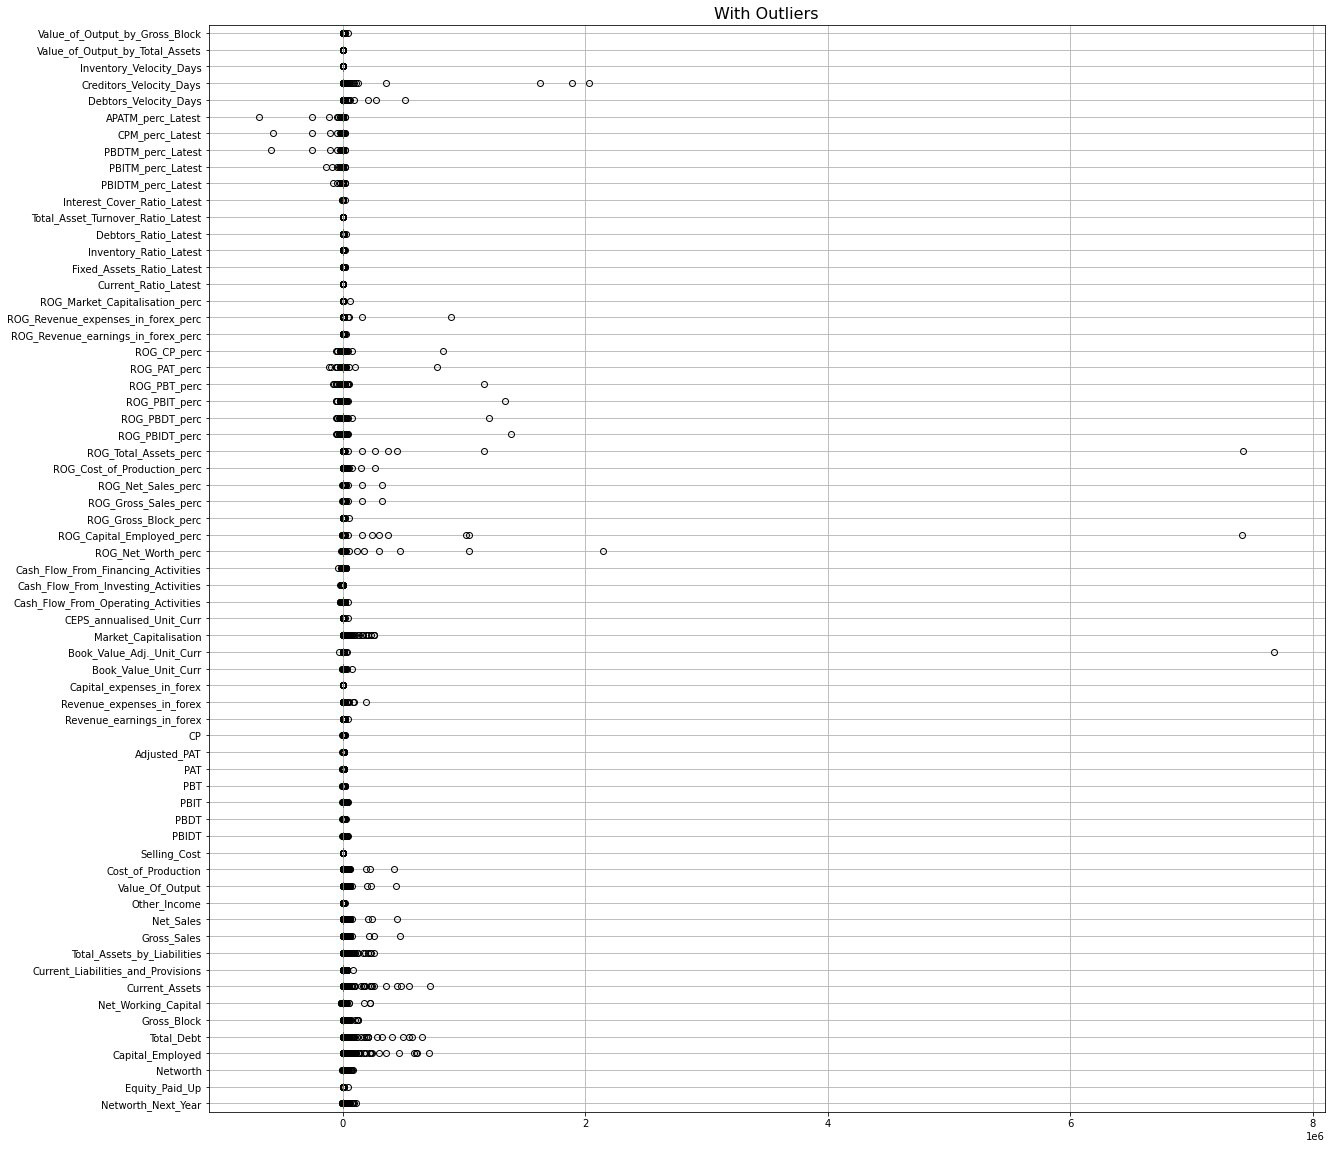

In [13]:
cont=Company.dtypes.index
plt.figure(figsize=(20,20))
Company[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [14]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [15]:
for column in Company[cont].columns:
    lr,ur=remove_outlier(Company[column])
    Company[column]=np.where(Company[column]>ur,ur,Company[column])
    Company[column]=np.where(Company[column]<lr,lr,Company[column])

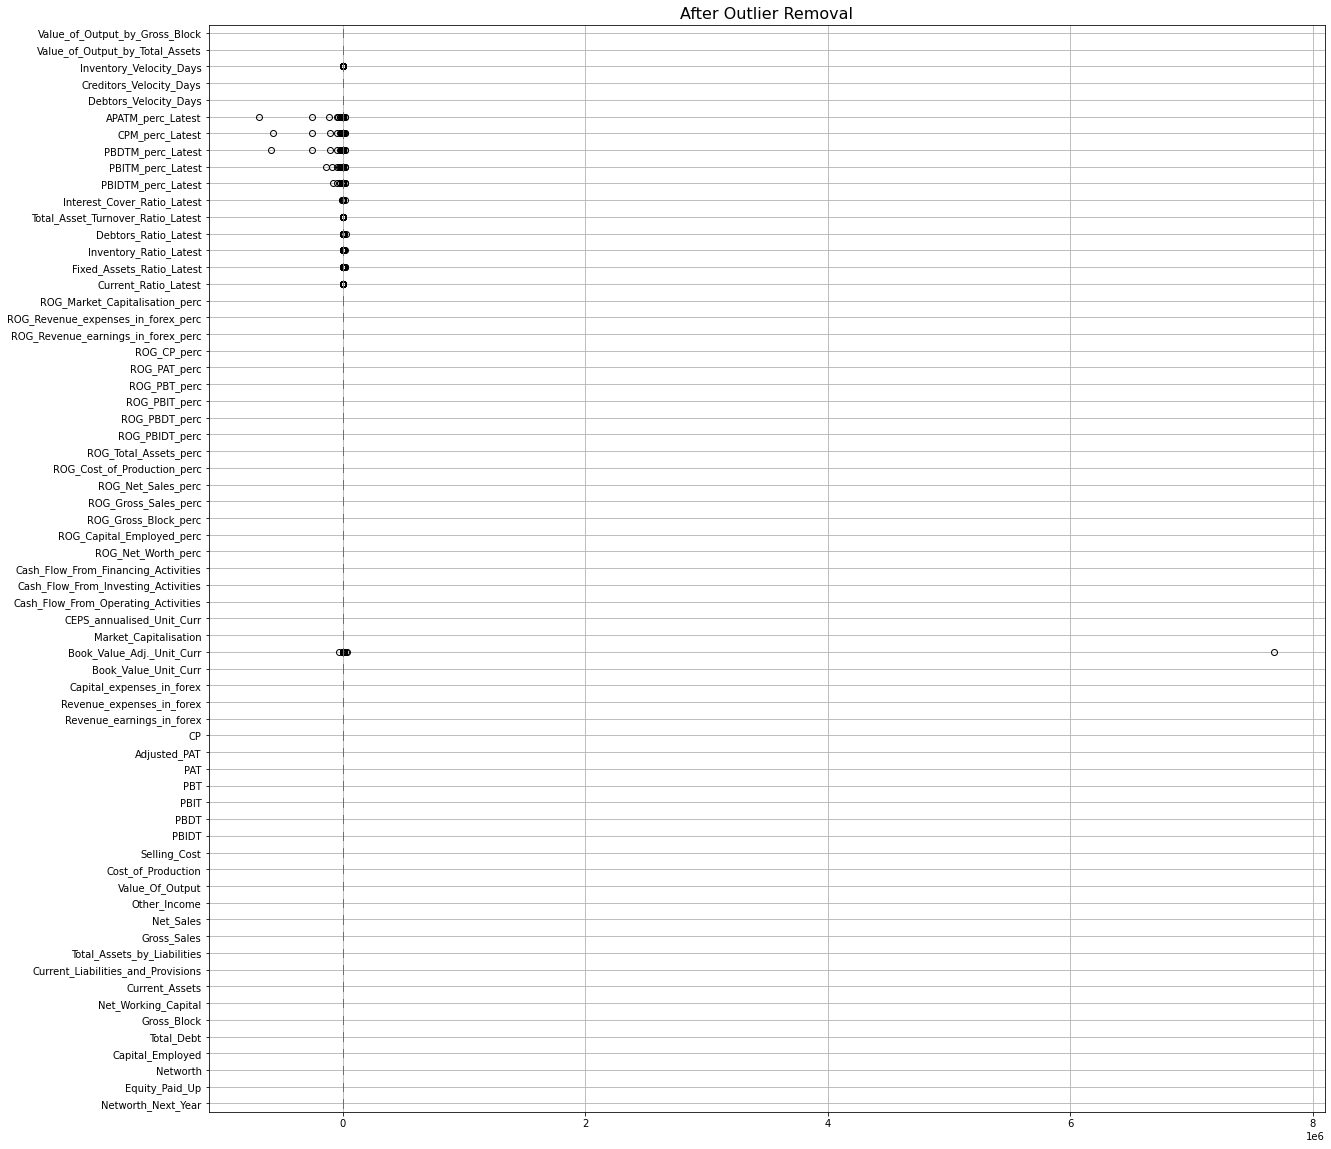

In [16]:
plt.figure(figsize=(20,20))
Company[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

In [17]:
Company.isnull().sum()

Networth_Next_Year                   0
Equity_Paid_Up                       0
Networth                             0
Capital_Employed                     0
Total_Debt                           0
                                  ... 
Debtors_Velocity_Days                0
Creditors_Velocity_Days              0
Inventory_Velocity_Days            103
Value_of_Output_by_Total_Assets      0
Value_of_Output_by_Gross_Block       0
Length: 65, dtype: int64

In [18]:
print(np.where(Company.isnull().sum()>0))

(array([27, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 62], dtype=int64),)


In [19]:
Company.iloc[:,63].isnull().sum()

0

In [20]:
for column in Company.columns:
    if Company[column].dtype != 'object':
        median = Company[column].median()
        Company[column] = Company[column].fillna(median)    
        
Company.isnull().sum()   

Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 65, dtype: int64

In [21]:
Company.isnull().sum()

Networth_Next_Year                 0
Equity_Paid_Up                     0
Networth                           0
Capital_Employed                   0
Total_Debt                         0
                                  ..
Debtors_Velocity_Days              0
Creditors_Velocity_Days            0
Inventory_Velocity_Days            0
Value_of_Output_by_Total_Assets    0
Value_of_Output_by_Gross_Block     0
Length: 65, dtype: int64

In [22]:
Company['default'] = np.where((Company['Networth_Next_Year'] > 0), 0, 1)

In [23]:
Company["default"].value_counts()

0    3198
1     388
Name: default, dtype: int64

In [24]:
Company.default.sum() / len(Company.default)

0.10819854991634133

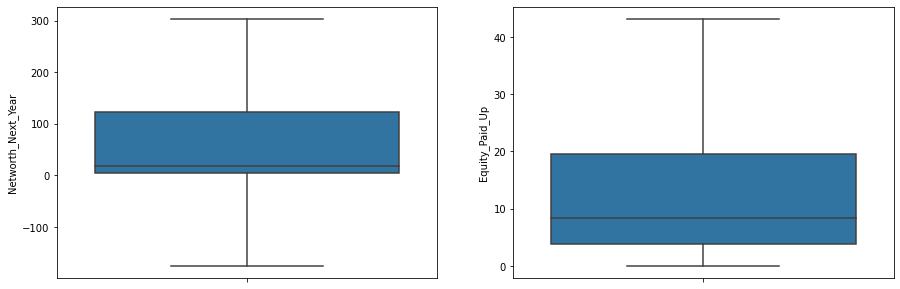

In [25]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = Company['Networth_Next_Year'])

plt.subplot(1,2,2)
sns.boxplot(y = Company['Equity_Paid_Up'])
plt.show()

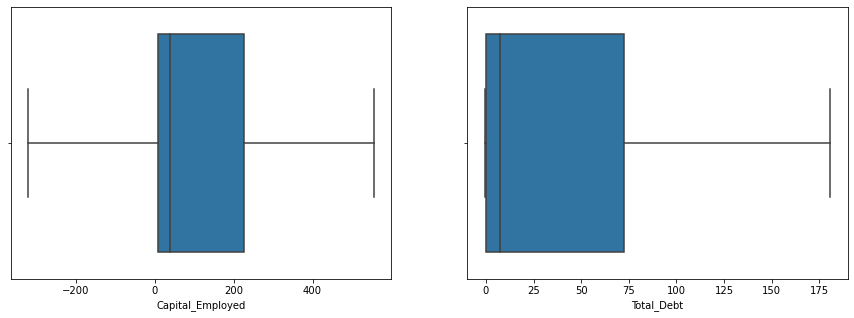

In [26]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Company['Capital_Employed'])

plt.subplot(1,2,2)
sns.boxplot(Company['Total_Debt'])
plt.show()

<AxesSubplot:xlabel='Current_Ratio_Latest', ylabel='Density'>

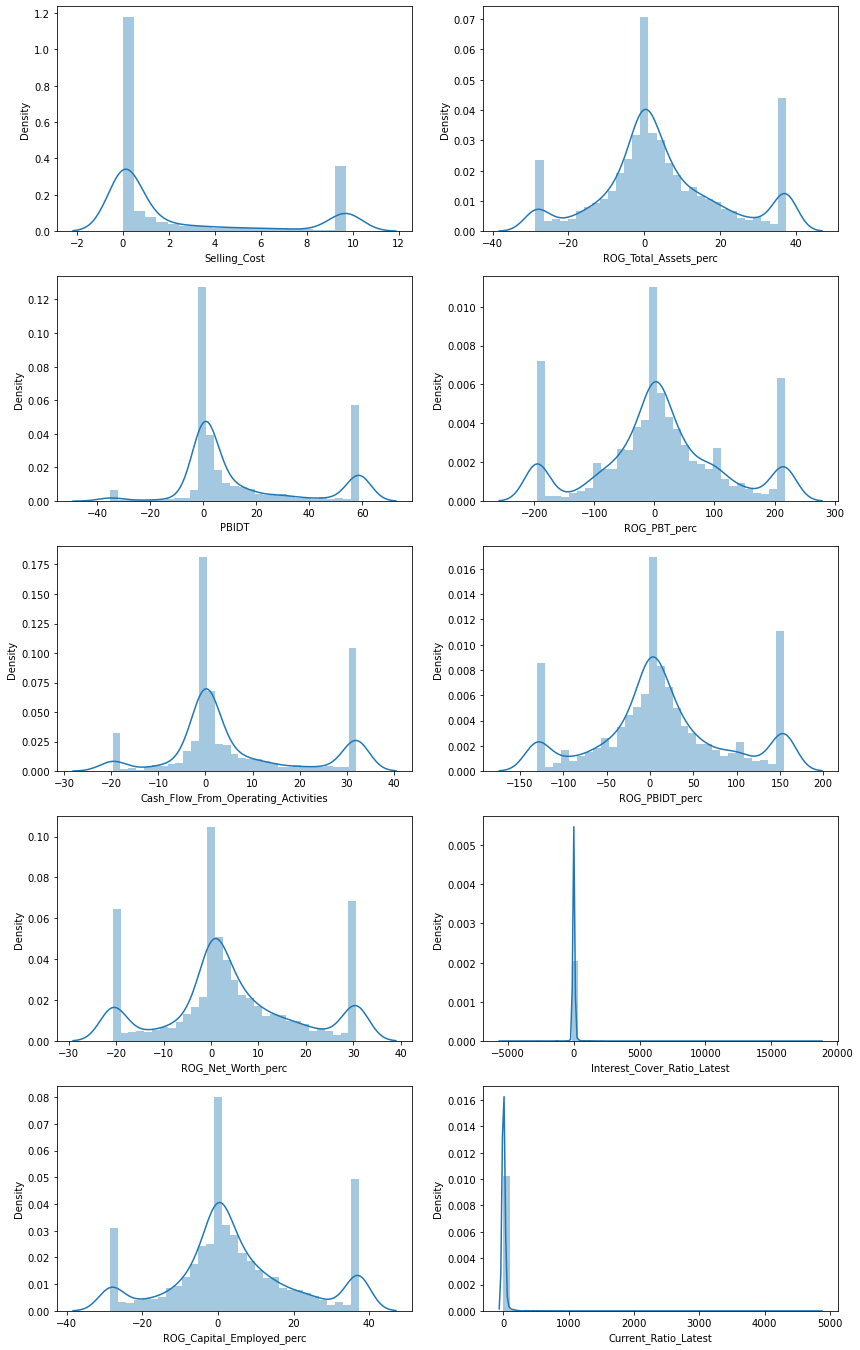

In [27]:
fig,axes = plt.subplots(nrows= 5, ncols=2)
fig.set_size_inches(14,24)
sns.distplot(Company['Selling_Cost'], ax= axes[0][0])
sns.distplot(Company['ROG_Total_Assets_perc'], ax= axes[0][1])
sns.distplot(Company['PBIDT'], ax= axes[1][0])
sns.distplot(Company['ROG_PBT_perc'], ax= axes[1][1])
sns.distplot(Company['Cash_Flow_From_Operating_Activities'], ax= axes[2][0])
sns.distplot(Company['ROG_PBIDT_perc'],ax= axes[2][1])
sns.distplot(Company['ROG_Net_Worth_perc'], ax= axes[3][0])
sns.distplot(Company['Interest_Cover_Ratio_Latest'], ax= axes[3][1])
sns.distplot(Company['ROG_Capital_Employed_perc'], ax= axes[4][0])
sns.distplot(Company['Current_Ratio_Latest'],ax= axes[4][1])

<AxesSubplot:xlabel='default', ylabel='count'>

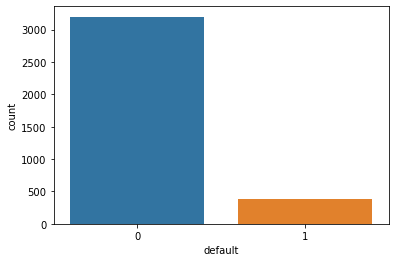

In [28]:
sns.countplot(Company['default'])

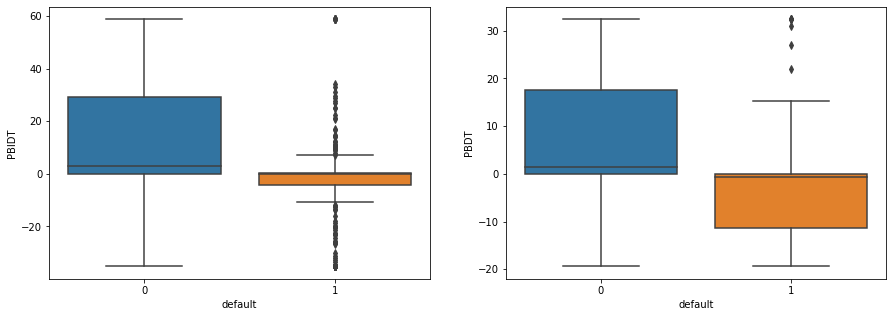

In [29]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Company['default'], Company['PBIDT'])

plt.subplot(1,2,2)
sns.boxplot(Company['default'], Company['PBDT'])
plt.show()

In [30]:
Q1, Q3 = Company['PBIDT'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [31]:
Company['PBIDT'] = np.where(Company['PBIDT'] > UL, UL, Company['PBIDT'] ) 
Company['PBIDT'] = np.where(Company['PBIDT'] < LL, LL, Company['PBIDT'] )

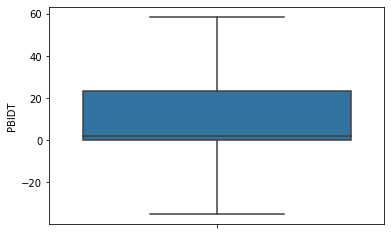

In [32]:
sns.boxplot(y = Company['PBIDT'])
plt.show()

In [33]:
Q1, Q3 = Company['APATM_perc_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [34]:
Company['APATM_perc_Latest'] = np.where(Company['APATM_perc_Latest'] < LL, LL, Company['APATM_perc_Latest'] ) 
Company['APATM_perc_Latest'] = np.where(Company['APATM_perc_Latest'] > UL, UL, Company['APATM_perc_Latest'] ) 

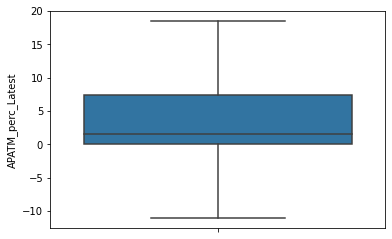

In [35]:
sns.boxplot(y = Company['APATM_perc_Latest'])
plt.show()

In [36]:
Q1, Q3 = Company['PBITM_perc_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [37]:
Company['PBITM_perc_Latest'] = np.where(Company['PBITM_perc_Latest'] > UL, UL, Company['PBITM_perc_Latest'] ) 
Company['PBITM_perc_Latest'] = np.where(Company['PBITM_perc_Latest'] < LL, LL, Company['PBITM_perc_Latest'] ) 

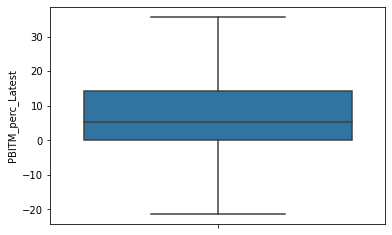

In [38]:
sns.boxplot(y = Company['PBITM_perc_Latest'])
plt.show()

In [39]:
Q1, Q3 = Company['CPM_perc_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [40]:
Company['CPM_perc_Latest'] = np.where(Company['CPM_perc_Latest'] < LL, LL, Company['CPM_perc_Latest'] ) 
Company['CPM_perc_Latest'] = np.where(Company['CPM_perc_Latest'] > UL, UL, Company['CPM_perc_Latest'] ) 

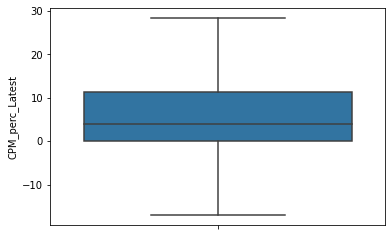

In [41]:
sns.boxplot(y = Company['CPM_perc_Latest'])
plt.show()

In [42]:
Q1, Q3 = Company['Inventory_Velocity_Days'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [43]:
Company['Inventory_Velocity_Days'] = np.where(Company['Inventory_Velocity_Days'] > UL, UL, Company['Inventory_Velocity_Days'] ) 
Company['Inventory_Velocity_Days'] = np.where(Company['Inventory_Velocity_Days'] < LL, LL, Company['Inventory_Velocity_Days'] ) 

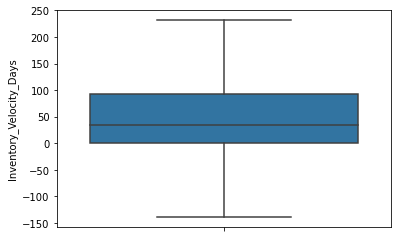

In [44]:
sns.boxplot(y = Company['Inventory_Velocity_Days'])
plt.show()

In [45]:
Q1, Q3 = Company['Interest_Cover_Ratio_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [46]:
Company['Interest_Cover_Ratio_Latest'] = np.where(Company['Interest_Cover_Ratio_Latest'] > UL, UL, Company['Interest_Cover_Ratio_Latest'] ) 
Company['Interest_Cover_Ratio_Latest'] = np.where(Company['Interest_Cover_Ratio_Latest'] < LL, LL, Company['Interest_Cover_Ratio_Latest'] )

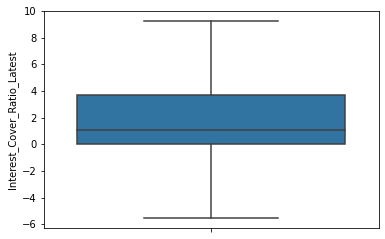

In [47]:
sns.boxplot(y = Company['Interest_Cover_Ratio_Latest'])
plt.show()

In [48]:
Q1, Q3 = Company['Debtors_Ratio_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [49]:
Company['Debtors_Ratio_Latest'] = np.where(Company['Debtors_Ratio_Latest'] > UL, UL, Company['Debtors_Ratio_Latest'] ) 
Company['Debtors_Ratio_Latest'] = np.where(Company['Debtors_Ratio_Latest'] < LL, LL, Company['Debtors_Ratio_Latest'] )

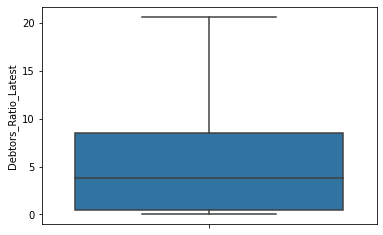

In [50]:
sns.boxplot(y = Company['Debtors_Ratio_Latest'])
plt.show()

In [51]:
Q1, Q3 = Company['Inventory_Ratio_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [52]:
Company['Inventory_Ratio_Latest'] = np.where(Company['Inventory_Ratio_Latest'] > UL, UL, Company['Inventory_Ratio_Latest'] ) 
Company['Inventory_Ratio_Latest'] = np.where(Company['Inventory_Ratio_Latest'] < LL, LL, Company['Inventory_Ratio_Latest'] )

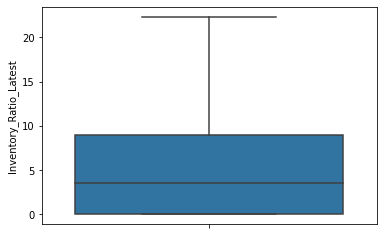

In [53]:
sns.boxplot(y = Company['Inventory_Ratio_Latest'])
plt.show()

In [54]:
Q1, Q3 = Company['Current_Ratio_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [55]:
Company['Current_Ratio_Latest'] = np.where(Company['Current_Ratio_Latest'] > UL, UL, Company['Current_Ratio_Latest'] ) 
Company['Current_Ratio_Latest'] = np.where(Company['Current_Ratio_Latest'] < LL, LL, Company['Current_Ratio_Latest'] )

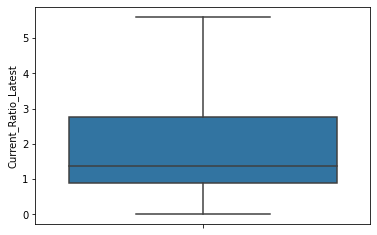

In [56]:
sns.boxplot(y = Company['Current_Ratio_Latest'])
plt.show()

In [57]:
Q1, Q3 = Company['Fixed_Assets_Ratio_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [58]:
Company['Fixed_Assets_Ratio_Latest'] = np.where(Company['Fixed_Assets_Ratio_Latest'] > UL, UL, Company['Fixed_Assets_Ratio_Latest'] ) 
Company['Fixed_Assets_Ratio_Latest'] = np.where(Company['Fixed_Assets_Ratio_Latest'] < LL, LL, Company['Fixed_Assets_Ratio_Latest'] )

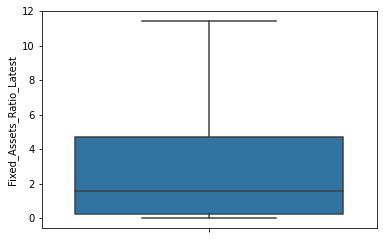

In [59]:
sns.boxplot(y = Company['Fixed_Assets_Ratio_Latest'])
plt.show()

In [60]:
Q1, Q3 = Company['Total_Asset_Turnover_Ratio_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [61]:
Company['Total_Asset_Turnover_Ratio_Latest'] = np.where(Company['Total_Asset_Turnover_Ratio_Latest'] > UL, UL, Company['Total_Asset_Turnover_Ratio_Latest'] ) 
Company['Total_Asset_Turnover_Ratio_Latest'] = np.where(Company['Total_Asset_Turnover_Ratio_Latest'] < LL, LL, Company['Total_Asset_Turnover_Ratio_Latest'] ) 

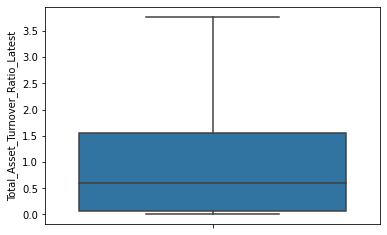

In [62]:
sns.boxplot(y = Company['Total_Asset_Turnover_Ratio_Latest'])
plt.show()

In [63]:
Q1, Q3 = Company['PBDTM_perc_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [64]:
Company['PBDTM_perc_Latest'] = np.where(Company['PBDTM_perc_Latest'] > UL, UL, Company['PBDTM_perc_Latest'] ) 
Company['PBDTM_perc_Latest'] = np.where(Company['PBDTM_perc_Latest'] < LL, LL, Company['PBDTM_perc_Latest'] ) 

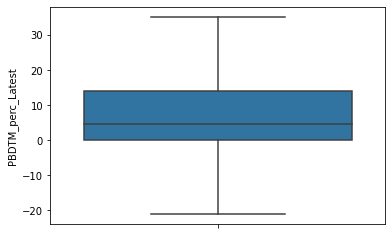

In [65]:
sns.boxplot(y = Company['PBDTM_perc_Latest'])
plt.show()

In [66]:
Q1, Q3 = Company['PBIDTM_perc_Latest'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [67]:
Company['PBIDTM_perc_Latest'] = np.where(Company['PBIDTM_perc_Latest'] < LL, LL, Company['PBIDTM_perc_Latest'] ) 
Company['PBIDTM_perc_Latest'] = np.where(Company['PBIDTM_perc_Latest'] > UL, UL, Company['PBIDTM_perc_Latest'] ) 

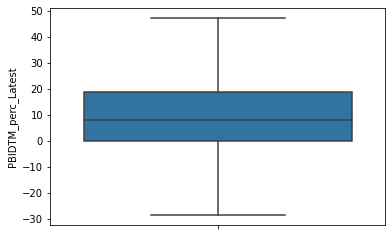

In [68]:
sns.boxplot(y = Company['PBIDTM_perc_Latest'])
plt.show()

In [69]:
Q1, Q3 = Company['Book_Value_Adj._Unit_Curr'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [70]:
Company['Book_Value_Adj._Unit_Curr'] = np.where(Company['Book_Value_Adj._Unit_Curr'] > UL, UL, Company['Book_Value_Adj._Unit_Curr'] ) 
Company['Book_Value_Adj._Unit_Curr'] = np.where(Company['Book_Value_Adj._Unit_Curr'] < LL, LL, Company['Book_Value_Adj._Unit_Curr'] ) 

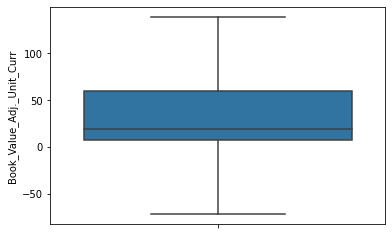

In [71]:
sns.boxplot(y = Company['Book_Value_Adj._Unit_Curr'])
plt.show()

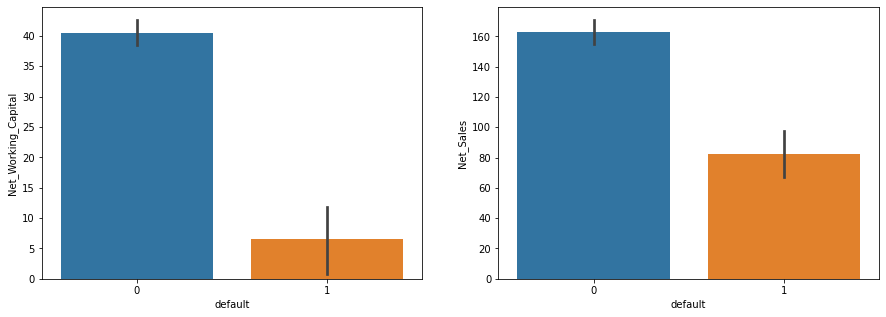

In [72]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.barplot(Company['default'], Company['Net_Working_Capital'])

plt.subplot(1,2,2)
sns.barplot(Company['default'], Company['Net_Sales'])
plt.show()

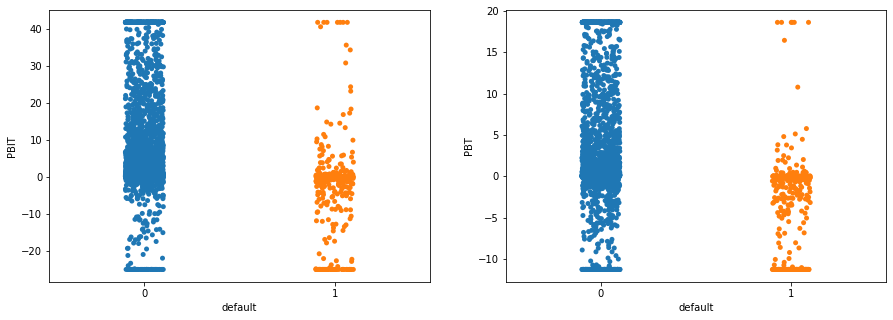

In [73]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.stripplot(Company['default'], Company['PBIT'])

plt.subplot(1,2,2)
sns.stripplot(Company['default'], Company['PBT'])
plt.show()

<AxesSubplot:>

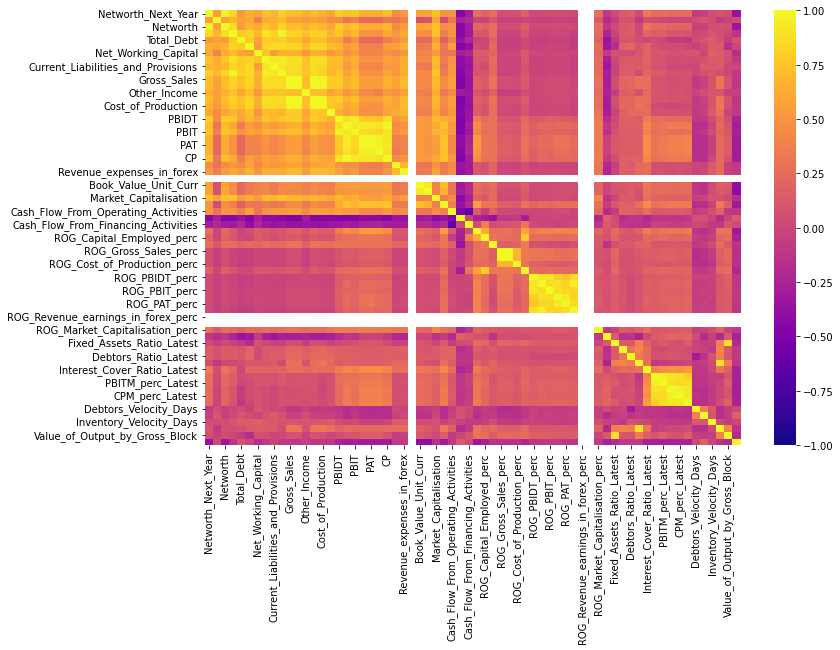

In [74]:
plt.figure(figsize = (12,8))
cor_matrix = Company.corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [75]:
import statsmodels.formula.api as SM

In [76]:
X = Company.drop(['default'], axis=1)
y = Company['default']

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42,stratify=Company['default'])

In [79]:
Default_train = pd.concat([X_train,y_train], axis=1)
Default_test = pd.concat([X_test,y_test], axis=1)

In [80]:
Default_train["default"].value_counts()

0    2142
1     260
Name: default, dtype: int64

In [81]:
Default_test["default"].value_counts()

0    1056
1     128
Name: default, dtype: int64

In [82]:
Default_train.default.sum() / len(Default_train.default)

0.10824313072439634

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

    return(vif)

In [84]:
calc_vif(X_train).sort_values(by='VIF', ascending = True).head(40)

,variables,VIF
62,Inventory_Velocity_Days,1.16
35,ROG_Gross_Block_perc,1.35
48,ROG_Market_Capitalisation_perc,1.37
61,Creditors_Velocity_Days,1.39
51,Inventory_Ratio_Latest,1.40
60,Debtors_Velocity_Days,1.41
52,Debtors_Ratio_Latest,1.45
49,Current_Ratio_Latest,1.45
38,ROG_Cost_of_Production_perc,1.92
54,Interest_Cover_Ratio_Latest,2.00


In [85]:
calc_vif(X_train).sort_values(by='VIF', ascending = True).tail(23)

,variables,VIF
7,Current_Assets,22.46
41,ROG_PBDT_perc,23.02
57,PBDTM_perc_Latest,24.16
56,PBITM_perc_Latest,25.20
18,PBIT,25.86
55,PBIDTM_perc_Latest,25.98
58,CPM_perc_Latest,27.29
16,PBIDT,29.81
14,Cost_of_Production,33.03
3,Capital_Employed,46.19


In [86]:
f_1 = 'default ~ Inventory_Velocity_Days + ROG_Gross_Block_perc + ROG_Market_Capitalisation_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Cash_Flow_From_Investing_Activities + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Selling_Cost + ROG_Capital_Employed_perc + Net_Working_Capital'

In [87]:
model_1 = SM.logit(formula = f_1, data=Company).fit()

Optimization terminated successfully.
         Current function value: 0.205849
         Iterations 8


In [88]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 3586
Model:                          Logit   Df Residuals:                     3562
Method:                           MLE   Df Model:                           23
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.3994
Time:                        16:27:53   Log-Likelihood:                -738.17
converged:                       True   LL-Null:                       -1229.0
Covariance Type:            nonrobust   LLR p-value:                1.021e-192
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -0.7186      0.152     -4.716      0.000      -1.017      -0.420
Inventory_Velocity_Days                -0.0011      0.001     -1.067      0.286      -0.003       0.001
ROG_Gross_Block_perc                   -0.0322      0.011     -2.818      0.005      -0.055      -0.010
ROG_Market_Capitalisation_perc        7.99e-05      0.002      0.048      0.962      -0.003       0.003
Creditors_Velocity_Days                 0.0034      0.001      3.751      0.000       0.002       0.005
Inventory_Ratio_Latest                 -0.0107      0.011     -0.950      0.342      -0.033       0.011
Debtors_Velocity_Days                  -0.0027      0.001     -3.158      0.002      -0.004      -0.001
Debtors_Ratio_Latest                   -0.0291      0.013     -2.313      0.021      -0.054      -0.004
Current_Ratio_Latest                   -0.7343      0.072    -10.157      0.000      -0.876      -0.593
ROG_Cost_of_Production_perc            -0.0062      0.002     -2.929      0.003      -0.010      -0.002
Interest_Cover_Ratio_Latest            -0.1709      0.025     -6.739      0.000      -0.221      -0.121
Cash_Flow_From_Investing_Activities     0.0157      0.020      0.790      0.430      -0.023       0.055
Revenue_earnings_in_forex              -0.0166      0.015     -1.076      0.282      -0.047       0.014
Equity_Paid_Up                          0.0176      0.006      2.797      0.005       0.005       0.030
Revenue_expenses_in_forex               0.0324      0.017      1.950      0.051      -0.000       0.065
Cash_Flow_From_Financing_Activities     0.0105      0.017      0.610      0.542      -0.023       0.044
ROG_Net_Worth_perc                     -0.0516      0.007     -7.591      0.000      -0.065      -0.038
ROG_Total_Assets_perc                  -0.0090      0.006     -1.407      0.159      -0.022       0.004
Other_Income                            0.0761      0.030      2.504      0.012       0.017       0.136
Market_Capitalisation                  -0.0083      0.001     -5.934      0.000      -0.011      -0.006
Cash_Flow_From_Operating_Activities    -0.0102      0.010     -1.041      0.298      -0.029       0.009
Selling_Cost                            0.0150      0.035      0.425      0.671      -0.054       0.084
ROG_Capital_Employed_perc               0.0013      0.006      0.195      0.845      -0.011       0.014
Net_Working_Capital                    -0.0088      0.002     -5.533      0.000      -0.012      -0.006
=======================================================================================================
"""

In [89]:
model_2 = SM.logit(formula = 'default ~ Inventory_Velocity_Days + ROG_Gross_Block_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Cash_Flow_From_Investing_Activities + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Selling_Cost + ROG_Capital_Employed_perc + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.202528
         Iterations 9


In [90]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           22
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4092
Time:                        16:27:53   Log-Likelihood:                -486.47
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.362e-128
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8806      0.182    -21.313      0.000      -4.237      -3.524
Inventory_Velocity_Days                -0.0669      0.087     -0.770      0.441      -0.237       0.103
ROG_Gross_Block_perc                   -0.2609      0.110     -2.365      0.018      -0.477      -0.045
Creditors_Velocity_Days                 0.2446      0.079      3.113      0.002       0.091       0.399
Inventory_Ratio_Latest                 -0.1148      0.101     -1.132      0.258      -0.314       0.084
Debtors_Velocity_Days                  -0.2644      0.087     -3.046      0.002      -0.435      -0.094
Debtors_Ratio_Latest                   -0.1594      0.101     -1.572      0.116      -0.358       0.039
Current_Ratio_Latest                   -1.2526      0.147     -8.533      0.000      -1.540      -0.965
ROG_Cost_of_Production_perc            -0.3155      0.087     -3.630      0.000      -0.486      -0.145
Interest_Cover_Ratio_Latest            -0.6945      0.126     -5.511      0.000      -0.942      -0.448
Cash_Flow_From_Investing_Activities     0.0538      0.156      0.345      0.730      -0.252       0.360
Revenue_earnings_in_forex              -0.1861      0.144     -1.291      0.197      -0.469       0.096
Equity_Paid_Up                          0.2625      0.107      2.454      0.014       0.053       0.472
Revenue_expenses_in_forex               0.3282      0.143      2.296      0.022       0.048       0.608
Cash_Flow_From_Financing_Activities     0.0434      0.174      0.249      0.803      -0.298       0.385
ROG_Net_Worth_perc                     -0.7756      0.123     -6.313      0.000      -1.016      -0.535
ROG_Total_Assets_perc                  -0.1960      0.129     -1.520      0.129      -0.449       0.057
Other_Income                            0.1650      0.132      1.252      0.210      -0.093       0.423
Market_Capitalisation                  -1.0129      0.201     -5.046      0.000      -1.406      -0.620
Cash_Flow_From_Operating_Activities    -0.1313      0.191     -0.688      0.492      -0.505       0.243
Selling_Cost                            0.0035      0.166      0.021      0.983      -0.322       0.329
ROG_Capital_Employed_perc               0.0703      0.136      0.516      0.606      -0.196       0.337
Net_Working_Capital                    -0.4913      0.121     -4.064      0.000      -0.728      -0.254
=======================================================================================================
"""

In [91]:
model_3 = SM.logit(formula = 'default ~ Inventory_Velocity_Days + ROG_Gross_Block_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Cash_Flow_From_Investing_Activities + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + Cash_Flow_From_Financing_Activities + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + ROG_Capital_Employed_perc + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.202528
         Iterations 9


In [92]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2380
Method:                           MLE   Df Model:                           21
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4092
Time:                        16:27:53   Log-Likelihood:                -486.47
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.115e-129
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8806      0.182    -21.315      0.000      -4.237      -3.524
Inventory_Velocity_Days                -0.0669      0.087     -0.771      0.441      -0.237       0.103
ROG_Gross_Block_perc                   -0.2608      0.110     -2.366      0.018      -0.477      -0.045
Creditors_Velocity_Days                 0.2446      0.079      3.114      0.002       0.091       0.399
Inventory_Ratio_Latest                 -0.1147      0.101     -1.133      0.257      -0.313       0.084
Debtors_Velocity_Days                  -0.2645      0.087     -3.058      0.002      -0.434      -0.095
Debtors_Ratio_Latest                   -0.1591      0.101     -1.579      0.114      -0.357       0.038
Current_Ratio_Latest                   -1.2527      0.147     -8.538      0.000      -1.540      -0.965
ROG_Cost_of_Production_perc            -0.3155      0.087     -3.630      0.000      -0.486      -0.145
Interest_Cover_Ratio_Latest            -0.6946      0.126     -5.512      0.000      -0.942      -0.448
Cash_Flow_From_Investing_Activities     0.0530      0.152      0.349      0.727      -0.245       0.351
Revenue_earnings_in_forex              -0.1852      0.139     -1.337      0.181      -0.457       0.086
Equity_Paid_Up                          0.2629      0.105      2.492      0.013       0.056       0.470
Revenue_expenses_in_forex               0.3290      0.138      2.388      0.017       0.059       0.599
Cash_Flow_From_Financing_Activities     0.0427      0.170      0.250      0.802      -0.291       0.377
ROG_Net_Worth_perc                     -0.7759      0.122     -6.343      0.000      -1.016      -0.536
ROG_Total_Assets_perc                  -0.1959      0.129     -1.520      0.129      -0.449       0.057
Other_Income                            0.1653      0.131      1.260      0.208      -0.092       0.422
Market_Capitalisation                  -1.0124      0.199     -5.091      0.000      -1.402      -0.623
Cash_Flow_From_Operating_Activities    -0.1317      0.189     -0.695      0.487      -0.503       0.240
ROG_Capital_Employed_perc               0.0704      0.136      0.518      0.605      -0.196       0.337
Net_Working_Capital                    -0.4909      0.120     -4.104      0.000      -0.725      -0.256
=======================================================================================================
"""

In [93]:
model_4 = SM.logit(formula = 'default ~ Inventory_Velocity_Days + ROG_Gross_Block_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Cash_Flow_From_Investing_Activities + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + ROG_Capital_Employed_perc + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.202541
         Iterations 9


In [94]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2381
Method:                           MLE   Df Model:                           20
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4092
Time:                        16:27:53   Log-Likelihood:                -486.50
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                7.207e-130
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8834      0.182    -21.355      0.000      -4.240      -3.527
Inventory_Velocity_Days                -0.0688      0.087     -0.794      0.427      -0.238       0.101
ROG_Gross_Block_perc                   -0.2635      0.110     -2.400      0.016      -0.479      -0.048
Creditors_Velocity_Days                 0.2447      0.079      3.116      0.002       0.091       0.399
Inventory_Ratio_Latest                 -0.1154      0.101     -1.140      0.254      -0.314       0.083
Debtors_Velocity_Days                  -0.2640      0.086     -3.054      0.002      -0.434      -0.095
Debtors_Ratio_Latest                   -0.1594      0.101     -1.583      0.113      -0.357       0.038
Current_Ratio_Latest                   -1.2511      0.146     -8.542      0.000      -1.538      -0.964
ROG_Cost_of_Production_perc            -0.3153      0.087     -3.629      0.000      -0.486      -0.145
Interest_Cover_Ratio_Latest            -0.6962      0.126     -5.530      0.000      -0.943      -0.449
Cash_Flow_From_Investing_Activities     0.0335      0.130      0.257      0.797      -0.222       0.289
Revenue_earnings_in_forex              -0.1881      0.138     -1.362      0.173      -0.459       0.083
Equity_Paid_Up                          0.2626      0.105      2.490      0.013       0.056       0.469
Revenue_expenses_in_forex               0.3305      0.138      2.403      0.016       0.061       0.600
ROG_Net_Worth_perc                     -0.7797      0.121     -6.428      0.000      -1.018      -0.542
ROG_Total_Assets_perc                  -0.1934      0.128     -1.505      0.132      -0.445       0.058
Other_Income                            0.1604      0.130      1.237      0.216      -0.094       0.415
Market_Capitalisation                  -1.0112      0.199     -5.088      0.000      -1.401      -0.622
Cash_Flow_From_Operating_Activities    -0.1670      0.127     -1.318      0.188      -0.415       0.081
ROG_Capital_Employed_perc               0.0761      0.134      0.568      0.570      -0.187       0.339
Net_Working_Capital                    -0.4937      0.119     -4.145      0.000      -0.727      -0.260
=======================================================================================================
"""

In [95]:
model_5 = SM.logit(formula = 'default ~ Inventory_Velocity_Days + ROG_Gross_Block_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + ROG_Capital_Employed_perc + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.202554
         Iterations 9


In [96]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2382
Method:                           MLE   Df Model:                           19
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4092
Time:                        16:27:53   Log-Likelihood:                -486.54
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.231e-130
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8834      0.182    -21.361      0.000      -4.240      -3.527
Inventory_Velocity_Days                -0.0684      0.087     -0.791      0.429      -0.238       0.101
ROG_Gross_Block_perc                   -0.2668      0.109     -2.450      0.014      -0.480      -0.053
Creditors_Velocity_Days                 0.2460      0.078      3.140      0.002       0.092       0.400
Inventory_Ratio_Latest                 -0.1142      0.101     -1.130      0.259      -0.312       0.084
Debtors_Velocity_Days                  -0.2648      0.086     -3.064      0.002      -0.434      -0.095
Debtors_Ratio_Latest                   -0.1601      0.101     -1.589      0.112      -0.357       0.037
Current_Ratio_Latest                   -1.2508      0.146     -8.540      0.000      -1.538      -0.964
ROG_Cost_of_Production_perc            -0.3153      0.087     -3.628      0.000      -0.486      -0.145
Interest_Cover_Ratio_Latest            -0.6983      0.126     -5.558      0.000      -0.945      -0.452
Revenue_earnings_in_forex              -0.1875      0.138     -1.359      0.174      -0.458       0.083
Equity_Paid_Up                          0.2612      0.105      2.481      0.013       0.055       0.468
Revenue_expenses_in_forex               0.3296      0.138      2.397      0.017       0.060       0.599
ROG_Net_Worth_perc                     -0.7775      0.121     -6.430      0.000      -1.015      -0.541
ROG_Total_Assets_perc                  -0.1963      0.128     -1.534      0.125      -0.447       0.055
Other_Income                            0.1639      0.129      1.271      0.204      -0.089       0.417
Market_Capitalisation                  -1.0167      0.197     -5.150      0.000      -1.404      -0.630
Cash_Flow_From_Operating_Activities    -0.1808      0.115     -1.572      0.116      -0.406       0.045
ROG_Capital_Employed_perc               0.0710      0.133      0.536      0.592      -0.189       0.331
Net_Working_Capital                    -0.4951      0.119     -4.162      0.000      -0.728      -0.262
=======================================================================================================
"""

In [97]:
model_6 = SM.logit(formula = 'default ~ Inventory_Velocity_Days + ROG_Gross_Block_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.202614
         Iterations 9


In [98]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2383
Method:                           MLE   Df Model:                           18
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4090
Time:                        16:27:53   Log-Likelihood:                -486.68
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.280e-131
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8767      0.181    -21.423      0.000      -4.231      -3.522
Inventory_Velocity_Days                -0.0690      0.087     -0.797      0.426      -0.239       0.101
ROG_Gross_Block_perc                   -0.2640      0.109     -2.423      0.015      -0.478      -0.050
Creditors_Velocity_Days                 0.2452      0.078      3.128      0.002       0.092       0.399
Inventory_Ratio_Latest                 -0.1162      0.101     -1.151      0.250      -0.314       0.082
Debtors_Velocity_Days                  -0.2645      0.086     -3.058      0.002      -0.434      -0.095
Debtors_Ratio_Latest                   -0.1579      0.101     -1.568      0.117      -0.355       0.040
Current_Ratio_Latest                   -1.2491      0.146     -8.534      0.000      -1.536      -0.962
ROG_Cost_of_Production_perc            -0.3172      0.087     -3.649      0.000      -0.488      -0.147
Interest_Cover_Ratio_Latest            -0.6939      0.125     -5.540      0.000      -0.939      -0.448
Revenue_earnings_in_forex              -0.1862      0.138     -1.349      0.177      -0.457       0.084
Equity_Paid_Up                          0.2575      0.105      2.451      0.014       0.052       0.463
Revenue_expenses_in_forex               0.3322      0.137      2.418      0.016       0.063       0.601
ROG_Net_Worth_perc                     -0.7539      0.112     -6.704      0.000      -0.974      -0.534
ROG_Total_Assets_perc                  -0.1556      0.103     -1.510      0.131      -0.358       0.046
Other_Income                            0.1645      0.129      1.277      0.201      -0.088       0.417
Market_Capitalisation                  -1.0127      0.197     -5.130      0.000      -1.400      -0.626
Cash_Flow_From_Operating_Activities    -0.1946      0.112     -1.736      0.082      -0.414       0.025
Net_Working_Capital                    -0.4856      0.118     -4.126      0.000      -0.716      -0.255
=======================================================================================================
"""

In [99]:
model_7 = SM.logit(formula = 'default ~ ROG_Gross_Block_perc + Creditors_Velocity_Days + Inventory_Ratio_Latest + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.202747
         Iterations 9


In [100]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2384
Method:                           MLE   Df Model:                           17
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4086
Time:                        16:27:53   Log-Likelihood:                -487.00
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.873e-132
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8765      0.181    -21.413      0.000      -4.231      -3.522
ROG_Gross_Block_perc                   -0.2656      0.109     -2.444      0.015      -0.479      -0.053
Creditors_Velocity_Days                 0.2416      0.078      3.083      0.002       0.088       0.395
Inventory_Ratio_Latest                 -0.1071      0.101     -1.066      0.287      -0.304       0.090
Debtors_Velocity_Days                  -0.2747      0.086     -3.199      0.001      -0.443      -0.106
Debtors_Ratio_Latest                   -0.1712      0.100     -1.719      0.086      -0.366       0.024
Current_Ratio_Latest                   -1.2551      0.147     -8.540      0.000      -1.543      -0.967
ROG_Cost_of_Production_perc            -0.3082      0.086     -3.580      0.000      -0.477      -0.139
Interest_Cover_Ratio_Latest            -0.6943      0.125     -5.542      0.000      -0.940      -0.449
Revenue_earnings_in_forex              -0.2025      0.136     -1.484      0.138      -0.470       0.065
Equity_Paid_Up                          0.2633      0.105      2.509      0.012       0.058       0.469
Revenue_expenses_in_forex               0.3298      0.137      2.405      0.016       0.061       0.599
ROG_Net_Worth_perc                     -0.7470      0.112     -6.681      0.000      -0.966      -0.528
ROG_Total_Assets_perc                  -0.1536      0.103     -1.494      0.135      -0.355       0.048
Other_Income                            0.1602      0.129      1.245      0.213      -0.092       0.412
Market_Capitalisation                  -1.0129      0.198     -5.120      0.000      -1.401      -0.625
Cash_Flow_From_Operating_Activities    -0.1942      0.112     -1.733      0.083      -0.414       0.025
Net_Working_Capital                    -0.4945      0.117     -4.209      0.000      -0.725      -0.264
=======================================================================================================
"""

In [101]:
model_8 = SM.logit(formula = 'default ~ ROG_Gross_Block_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Other_Income + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.202989
         Iterations 9


In [102]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2385
Method:                           MLE   Df Model:                           16
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4079
Time:                        16:27:53   Log-Likelihood:                -487.58
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.304e-132
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8762      0.181    -21.384      0.000      -4.231      -3.521
ROG_Gross_Block_perc                   -0.2720      0.108     -2.512      0.012      -0.484      -0.060
Creditors_Velocity_Days                 0.2474      0.078      3.163      0.002       0.094       0.401
Debtors_Velocity_Days                  -0.2891      0.085     -3.394      0.001      -0.456      -0.122
Debtors_Ratio_Latest                   -0.2072      0.094     -2.194      0.028      -0.392      -0.022
Current_Ratio_Latest                   -1.2633      0.148     -8.525      0.000      -1.554      -0.973
ROG_Cost_of_Production_perc            -0.3080      0.086     -3.573      0.000      -0.477      -0.139
Interest_Cover_Ratio_Latest            -0.6966      0.125     -5.574      0.000      -0.942      -0.452
Revenue_earnings_in_forex              -0.2002      0.136     -1.471      0.141      -0.467       0.067
Equity_Paid_Up                          0.2603      0.105      2.478      0.013       0.054       0.466
Revenue_expenses_in_forex               0.3180      0.137      2.327      0.020       0.050       0.586
ROG_Net_Worth_perc                     -0.7476      0.112     -6.699      0.000      -0.966      -0.529
ROG_Total_Assets_perc                  -0.1512      0.103     -1.474      0.140      -0.352       0.050
Other_Income                            0.1605      0.129      1.246      0.213      -0.092       0.413
Market_Capitalisation                  -1.0238      0.198     -5.159      0.000      -1.413      -0.635
Cash_Flow_From_Operating_Activities    -0.2026      0.112     -1.811      0.070      -0.422       0.017
Net_Working_Capital                    -0.4859      0.117     -4.140      0.000      -0.716      -0.256
=======================================================================================================
"""

In [103]:
model_9 = SM.logit(formula = 'default ~ ROG_Gross_Block_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Revenue_earnings_in_forex + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.203308
         Iterations 9


In [104]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2386
Method:                           MLE   Df Model:                           15
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4070
Time:                        16:27:53   Log-Likelihood:                -488.35
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.054e-133
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8624      0.180    -21.472      0.000      -4.215      -3.510
ROG_Gross_Block_perc                   -0.2647      0.108     -2.441      0.015      -0.477      -0.052
Creditors_Velocity_Days                 0.2518      0.078      3.222      0.001       0.099       0.405
Debtors_Velocity_Days                  -0.2871      0.085     -3.372      0.001      -0.454      -0.120
Debtors_Ratio_Latest                   -0.1984      0.094     -2.110      0.035      -0.383      -0.014
Current_Ratio_Latest                   -1.2794      0.148     -8.625      0.000      -1.570      -0.989
ROG_Cost_of_Production_perc            -0.3106      0.086     -3.611      0.000      -0.479      -0.142
Interest_Cover_Ratio_Latest            -0.6882      0.125     -5.513      0.000      -0.933      -0.444
Revenue_earnings_in_forex              -0.1846      0.135     -1.364      0.173      -0.450       0.081
Equity_Paid_Up                          0.2876      0.103      2.803      0.005       0.087       0.489
Revenue_expenses_in_forex               0.3341      0.135      2.467      0.014       0.069       0.600
ROG_Net_Worth_perc                     -0.7457      0.113     -6.623      0.000      -0.966      -0.525
ROG_Total_Assets_perc                  -0.1570      0.102     -1.533      0.125      -0.358       0.044
Market_Capitalisation                  -0.9446      0.187     -5.064      0.000      -1.310      -0.579
Cash_Flow_From_Operating_Activities    -0.1999      0.112     -1.779      0.075      -0.420       0.020
Net_Working_Capital                    -0.4569      0.115     -3.972      0.000      -0.682      -0.231
=======================================================================================================
"""

In [105]:
model_10 = SM.logit(formula = 'default ~ ROG_Gross_Block_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + ROG_Total_Assets_perc + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.203705
         Iterations 9


In [106]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2387
Method:                           MLE   Df Model:                           14
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4058
Time:                        16:27:53   Log-Likelihood:                -489.30
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                1.466e-133
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8549      0.179    -21.501      0.000      -4.206      -3.503
ROG_Gross_Block_perc                   -0.2740      0.109     -2.521      0.012      -0.487      -0.061
Creditors_Velocity_Days                 0.2558      0.078      3.272      0.001       0.103       0.409
Debtors_Velocity_Days                  -0.2912      0.085     -3.419      0.001      -0.458      -0.124
Debtors_Ratio_Latest                   -0.2117      0.094     -2.251      0.024      -0.396      -0.027
Current_Ratio_Latest                   -1.2757      0.149     -8.586      0.000      -1.567      -0.984
ROG_Cost_of_Production_perc            -0.3089      0.086     -3.582      0.000      -0.478      -0.140
Interest_Cover_Ratio_Latest            -0.6900      0.124     -5.543      0.000      -0.934      -0.446
Equity_Paid_Up                          0.2815      0.102      2.748      0.006       0.081       0.482
Revenue_expenses_in_forex               0.2513      0.122      2.061      0.039       0.012       0.490
ROG_Net_Worth_perc                     -0.7439      0.112     -6.629      0.000      -0.964      -0.524
ROG_Total_Assets_perc                  -0.1599      0.103     -1.560      0.119      -0.361       0.041
Market_Capitalisation                  -0.9521      0.187     -5.098      0.000      -1.318      -0.586
Cash_Flow_From_Operating_Activities    -0.2178      0.111     -1.955      0.051      -0.436       0.001
Net_Working_Capital                    -0.4753      0.114     -4.163      0.000      -0.699      -0.252
=======================================================================================================
"""

In [107]:
model_11 = SM.logit(formula = 'default ~ ROG_Gross_Block_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + Market_Capitalisation + Cash_Flow_From_Operating_Activities + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.204218
         Iterations 9


In [108]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2388
Method:                           MLE   Df Model:                           13
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4043
Time:                        16:27:53   Log-Likelihood:                -490.53
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                6.725e-134
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.8627      0.180    -21.461      0.000      -4.215      -3.510
ROG_Gross_Block_perc                   -0.3106      0.106     -2.936      0.003      -0.518      -0.103
Creditors_Velocity_Days                 0.2576      0.078      3.298      0.001       0.105       0.411
Debtors_Velocity_Days                  -0.2861      0.085     -3.367      0.001      -0.453      -0.120
Debtors_Ratio_Latest                   -0.2102      0.094     -2.244      0.025      -0.394      -0.027
Current_Ratio_Latest                   -1.2760      0.149     -8.575      0.000      -1.568      -0.984
ROG_Cost_of_Production_perc            -0.3203      0.086     -3.743      0.000      -0.488      -0.153
Interest_Cover_Ratio_Latest            -0.6981      0.125     -5.595      0.000      -0.943      -0.454
Equity_Paid_Up                          0.2915      0.102      2.862      0.004       0.092       0.491
Revenue_expenses_in_forex               0.2482      0.122      2.036      0.042       0.009       0.487
ROG_Net_Worth_perc                     -0.8148      0.103     -7.874      0.000      -1.018      -0.612
Market_Capitalisation                  -0.9734      0.186     -5.237      0.000      -1.338      -0.609
Cash_Flow_From_Operating_Activities    -0.2051      0.111     -1.847      0.065      -0.423       0.013
Net_Working_Capital                    -0.4934      0.113     -4.354      0.000      -0.715      -0.271
=======================================================================================================
"""

In [109]:
model_12 = SM.logit(formula = 'default ~ ROG_Gross_Block_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Equity_Paid_Up + Revenue_expenses_in_forex + ROG_Net_Worth_perc + Market_Capitalisation + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.204935
         Iterations 9


In [110]:
model_12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2389
Method:                           MLE   Df Model:                           12
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4022
Time:                        16:27:54   Log-Likelihood:                -492.25
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                4.820e-134
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.8435      0.178    -21.578      0.000      -4.193      -3.494
ROG_Gross_Block_perc           -0.3018      0.105     -2.863      0.004      -0.508      -0.095
Creditors_Velocity_Days         0.2618      0.078      3.346      0.001       0.108       0.415
Debtors_Velocity_Days          -0.2987      0.085     -3.518      0.000      -0.465      -0.132
Debtors_Ratio_Latest           -0.2254      0.093     -2.413      0.016      -0.409      -0.042
Current_Ratio_Latest           -1.2662      0.148     -8.547      0.000      -1.557      -0.976
ROG_Cost_of_Production_perc    -0.3262      0.086     -3.796      0.000      -0.495      -0.158
Interest_Cover_Ratio_Latest    -0.7071      0.125     -5.657      0.000      -0.952      -0.462
Equity_Paid_Up                  0.2845      0.101      2.807      0.005       0.086       0.483
Revenue_expenses_in_forex       0.1979      0.118      1.675      0.094      -0.034       0.429
ROG_Net_Worth_perc             -0.8300      0.103     -8.053      0.000      -1.032      -0.628
Market_Capitalisation          -0.9997      0.184     -5.431      0.000      -1.360      -0.639
Net_Working_Capital            -0.4866      0.112     -4.356      0.000      -0.706      -0.268
===============================================================================================
"""

In [111]:
model_13 = SM.logit(formula = 'default ~ ROG_Gross_Block_perc + Creditors_Velocity_Days + Debtors_Velocity_Days + Debtors_Ratio_Latest + Current_Ratio_Latest + ROG_Cost_of_Production_perc + Interest_Cover_Ratio_Latest + Equity_Paid_Up + ROG_Net_Worth_perc + Market_Capitalisation + Net_Working_Capital', data=Default_train).fit()

Optimization terminated successfully.
         Current function value: 0.205507
         Iterations 9


In [112]:
model_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 2402
Model:                          Logit   Df Residuals:                     2390
Method:                           MLE   Df Model:                           11
Date:                Fri, 20 May 2022   Pseudo R-squ.:                  0.4006
Time:                        16:27:54   Log-Likelihood:                -493.63
converged:                       True   LL-Null:                       -823.47
Covariance Type:            nonrobust   LLR p-value:                2.352e-134
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.8163      0.176    -21.734      0.000      -4.160      -3.472
ROG_Gross_Block_perc           -0.2906      0.105     -2.780      0.005      -0.495      -0.086
Creditors_Velocity_Days         0.2554      0.078      3.285      0.001       0.103       0.408
Debtors_Velocity_Days          -0.2998      0.084     -3.550      0.000      -0.465      -0.134
Debtors_Ratio_Latest           -0.2079      0.092     -2.261      0.024      -0.388      -0.028
Current_Ratio_Latest           -1.2754      0.147     -8.665      0.000      -1.564      -0.987
ROG_Cost_of_Production_perc    -0.3234      0.085     -3.790      0.000      -0.491      -0.156
Interest_Cover_Ratio_Latest    -0.6708      0.122     -5.498      0.000      -0.910      -0.432
Equity_Paid_Up                  0.3119      0.100      3.114      0.002       0.116       0.508
ROG_Net_Worth_perc             -0.8327      0.103     -8.086      0.000      -1.035      -0.631
Market_Capitalisation          -0.9275      0.177     -5.245      0.000      -1.274      -0.581
Net_Working_Capital            -0.4324      0.107     -4.050      0.000      -0.642      -0.223
===============================================================================================
"""

In [113]:
y_prob_pred_train = model_13.predict(Default_train)
y_prob_pred_train

842    0.01
1057   0.00
1595   0.00
100    0.67
1191   0.03
       ... 
1815   0.01
2852   0.11
1505   0.00
375    0.45
3428   0.00
Length: 2402, dtype: float64

In [114]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

In [115]:
from sklearn import metrics

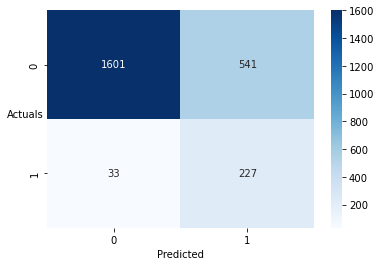

In [116]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [117]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.747     0.848      2142
           1      0.296     0.873     0.442       260

    accuracy                          0.761      2402
   macro avg      0.638     0.810     0.645      2402
weighted avg      0.906     0.761     0.804      2402



In [118]:
y_prob_pred_test = model_13.predict(Default_test)
y_prob_pred_test

251    0.32
3493   0.00
3063   0.02
2384   0.04
1679   0.00
       ... 
1321   0.05
2666   0.01
773    0.00
3488   0.00
2956   0.08
Length: 1184, dtype: float64

In [119]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.07:
        a=1
    else:
        a=0
    y_class_pred.append(a)

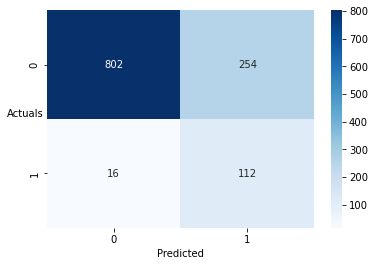

In [120]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [121]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.980     0.759     0.856      1056
           1      0.306     0.875     0.453       128

    accuracy                          0.772      1184
   macro avg      0.643     0.817     0.655      1184
weighted avg      0.908     0.772     0.812      1184



In [122]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Default_train['default'],y_prob_pred_train)

In [123]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.12666772740032747

In [124]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.13:
        a=1
    else:
        a=0
    y_class_pred.append(a)

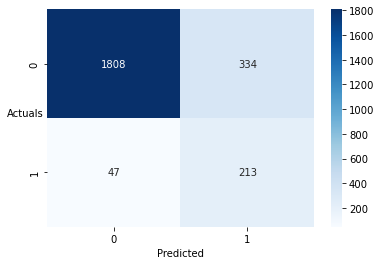

In [125]:
sns.heatmap((metrics.confusion_matrix(Default_train['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [126]:
print(metrics.classification_report(Default_train['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.975     0.844     0.905      2142
           1      0.389     0.819     0.528       260

    accuracy                          0.841      2402
   macro avg      0.682     0.832     0.716      2402
weighted avg      0.911     0.841     0.864      2402



In [127]:
y_prob_pred_test = model_13.predict(Default_test)

In [128]:
y_class_pred=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.13:
        a=1
    else:
        a=0
    y_class_pred.append(a)

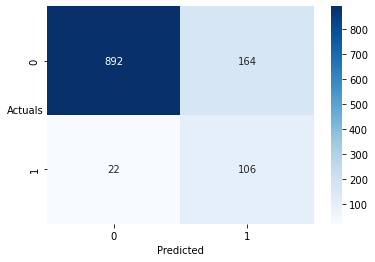

In [129]:
sns.heatmap((metrics.confusion_matrix(Default_test['default'],y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [130]:
print(metrics.classification_report(Default_test['default'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.976     0.845     0.906      1056
           1      0.393     0.828     0.533       128

    accuracy                          0.843      1184
   macro avg      0.684     0.836     0.719      1184
weighted avg      0.913     0.843     0.865      1184



In [131]:
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression()

In [132]:
from sklearn.feature_selection import RFE
selector = RFE(estimator = LogR, n_features_to_select=21, step=1)

In [133]:
selector = selector.fit(X_train, y_train)

In [134]:
selector.n_features_

21

In [135]:
selector.ranking_

array([ 1, 35,  1, 16,  1,  7, 30,  1,  1, 20,  3, 36, 28, 21, 41,  1, 29,
       24,  1,  1, 13,  1, 17,  2, 22, 43,  1,  1, 34,  9,  4, 27, 26,  1,
        1, 14, 38, 25,  1,  1, 11, 10, 15, 32, 39, 42, 45, 44, 33,  1, 23,
        1, 12, 37,  5, 31,  1,  1, 19,  1,  1, 40, 18,  6,  8])

In [136]:
df = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
0,Networth_Next_Year,1
2,Networth,1
4,Total_Debt,1
7,Current_Assets,1
8,Current_Liabilities_and_Provisions,1
15,Selling_Cost,1
18,PBIT,1
19,PBT,1
21,Adjusted_PAT,1
26,Book_Value_Unit_Curr,1


In [137]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

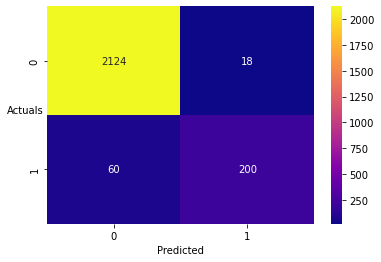

In [138]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap((metrics.confusion_matrix(y_train,pred_train)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [139]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2142
           1       0.92      0.77      0.84       260

    accuracy                           0.97      2402
   macro avg       0.94      0.88      0.91      2402
weighted avg       0.97      0.97      0.97      2402



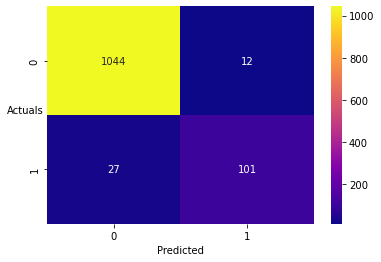

In [140]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test)),annot=True,fmt='.5g'
            ,cmap='plasma');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [141]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1056
           1       0.89      0.79      0.84       128

    accuracy                           0.97      1184
   macro avg       0.93      0.89      0.91      1184
weighted avg       0.97      0.97      0.97      1184



In [142]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [143]:
from sklearn.feature_selection import RFE
selector_smote = selector.fit(X_res, y_res)

In [144]:
selector_smote.n_features_

21

In [145]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [146]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2142
           1       0.96      0.98      0.97      2142

    accuracy                           0.97      4284
   macro avg       0.97      0.97      0.97      4284
weighted avg       0.97      0.97      0.97      4284



In [147]:
print(classification_report(y_test, pred_test_smote))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1056
           1       0.70      0.95      0.81       128

    accuracy                           0.95      1184
   macro avg       0.85      0.95      0.89      1184
weighted avg       0.96      0.95      0.95      1184



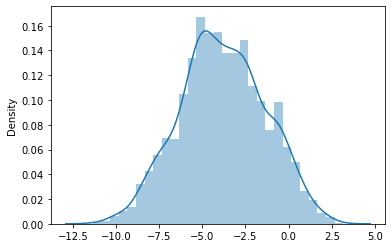

In [148]:
sns.distplot(model_13.fittedvalues);

In [149]:
print('The adjusted pseudo R-square value is',1 - ((model_13.llf - model_13.df_model)/model_13.llnull))

The adjusted pseudo R-square value is 0.3871920823697387


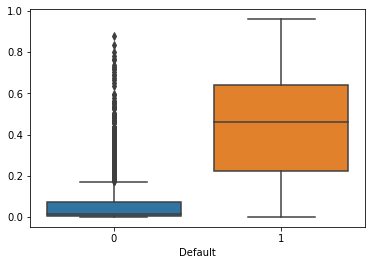

In [150]:
sns.boxplot(x=Company['default'],y=y_prob_pred_train)
plt.xlabel('Default');

In [151]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [152]:
LDA = LinearDiscriminantAnalysis()

In [153]:
lda_model = LDA.fit(X_train, y_train)

In [154]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [155]:
print(metrics.classification_report(y_train, pred_train_lda))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      2142
           1       0.86      0.59      0.70       260

    accuracy                           0.95      2402
   macro avg       0.91      0.79      0.84      2402
weighted avg       0.94      0.95      0.94      2402



In [156]:
print(metrics.classification_report(y_test, pred_test_lda))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1056
           1       0.81      0.59      0.68       128

    accuracy                           0.94      1184
   macro avg       0.88      0.79      0.83      1184
weighted avg       0.94      0.94      0.94      1184



In [157]:
pred_train_lda_prob = lda_model.predict_proba(X_train)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [158]:
fpr, tpr, thresholds = roc_curve(y_train,pred_train_lda_prob)

In [159]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.08464247073122767

In [160]:
y_class_pred=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

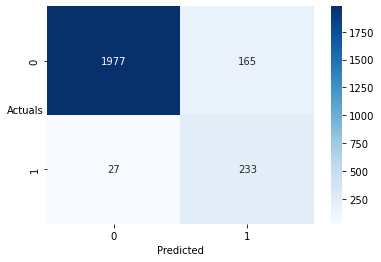

In [161]:
sns.heatmap((metrics.confusion_matrix(y_train,y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [162]:
print(metrics.classification_report(y_train, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.987     0.923     0.954      2142
           1      0.585     0.896     0.708       260

    accuracy                          0.920      2402
   macro avg      0.786     0.910     0.831      2402
weighted avg      0.943     0.920     0.927      2402



In [163]:
y_class_pred=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.08:
        a=1
    else:
        a=0
    y_class_pred.append(a)

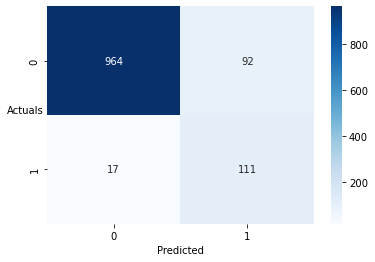

In [164]:
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [165]:
print(metrics.classification_report(y_test, y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.983     0.913     0.946      1056
           1      0.547     0.867     0.671       128

    accuracy                          0.908      1184
   macro avg      0.765     0.890     0.809      1184
weighted avg      0.936     0.908     0.917      1184



In [166]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [167]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [168]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 25}

In [169]:
best_grid = grid_search.best_estimator_

In [170]:
pred_train_rf = best_grid.predict(X_train)
pred_test_rf = best_grid.predict(X_test)

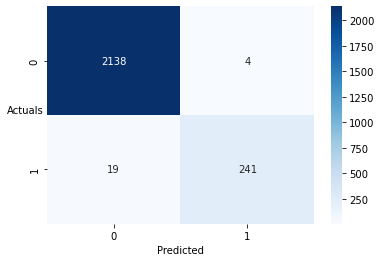

In [171]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

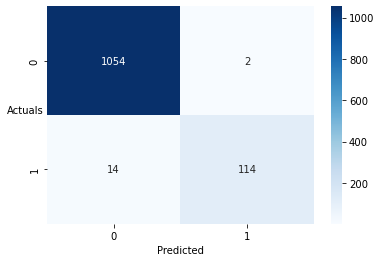

In [172]:
sns.heatmap((metrics.confusion_matrix(y_test, pred_test_rf)),annot=True,fmt='.5g'
            ,cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [173]:
print(metrics.classification_report(y_train, pred_train_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2142
           1       0.98      0.93      0.95       260

    accuracy                           0.99      2402
   macro avg       0.99      0.96      0.97      2402
weighted avg       0.99      0.99      0.99      2402



In [174]:
print(metrics.classification_report(y_test, pred_test_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1056
           1       0.98      0.89      0.93       128

    accuracy                           0.99      1184
   macro avg       0.98      0.94      0.96      1184
weighted avg       0.99      0.99      0.99      1184



AUC: 0.999


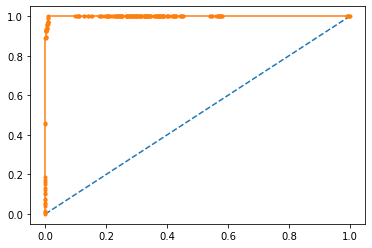

In [175]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
rf_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % rf_train_auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 1.000


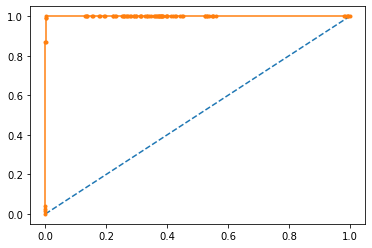

In [176]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
rf_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % rf_test_auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.966


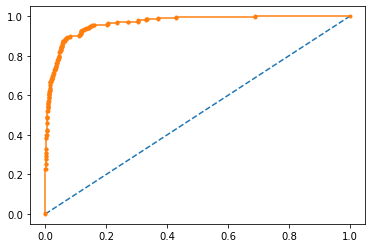

In [177]:
probs = lda_model.predict_proba(X_train)
probs = probs[:, 1]
lda_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lda_train_auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.963


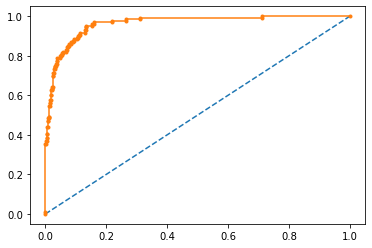

In [178]:
probs = lda_model.predict_proba(X_test)
probs = probs[:, 1]
lda_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lda_test_auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.992


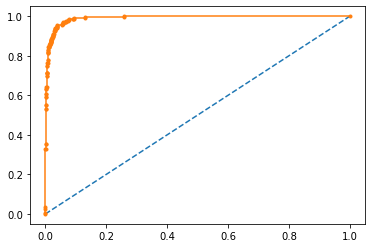

In [179]:
probs = selector.predict_proba(X_train)
probs = probs[:, 1]
logistic_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logistic_train_auc)
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

AUC: 0.991


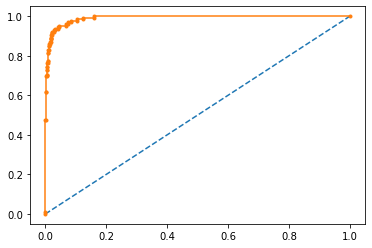

In [180]:
probs = selector.predict_proba(X_test)
probs = probs[:, 1]
logistic_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logistic_test_auc)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [181]:
logistic_metrics=classification_report(y_train, pred_train,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_train_f1=round(df.loc["1"][2],2)
logistic_train_recall=round(df.loc["1"][1],2)
logistic_train_precision=round(df.loc["1"][0],2)
print ('Logistic_train_precision ',logistic_train_precision)
print ('Logistic_train_recall ',logistic_train_recall)
print ('Logistic_train_f1 ',logistic_train_f1)

Logistic_train_precision  0.92
Logistic_train_recall  0.77
Logistic_train_f1  0.84


In [182]:
logistic_train_acc=selector.score(X_train,y_train) 
logistic_train_acc

0.9554537885095754

In [183]:
logistic_metrics=classification_report(y_test, pred_test,output_dict=True)
df=pd.DataFrame(logistic_metrics).transpose()
logistic_test_f1=round(df.loc["1"][2],2)
logistic_test_recall=round(df.loc["1"][1],2)
logistic_test_precision=round(df.loc["1"][0],2)
print ('Logistic_test_precision ',logistic_test_precision)
print ('Logistic_test_recall ',logistic_test_recall)
print ('Logistic_test_f1 ',logistic_test_f1)

Logistic_test_precision  0.89
Logistic_test_recall  0.79
Logistic_test_f1  0.84


In [184]:
logistic_test_acc=selector.score(X_test,y_test) 
logistic_test_acc

0.9510135135135135

In [185]:
rf_metrics=classification_report(y_train, pred_train_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_f1=round(df.loc["1"][2],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_precision=round(df.loc["1"][0],2)
print ('Random_Forest_train_precision ',rf_train_precision)
print ('Random_Forest_train_recall ',rf_train_recall)
print ('Random_Forest_train_f1 ',rf_train_f1)

Random_Forest_train_precision  0.98
Random_Forest_train_recall  0.93
Random_Forest_train_f1  0.95


In [186]:
rf_train_acc=best_grid.score(X_train,y_train) 
rf_train_acc

0.9904246461282264

In [187]:
rf_test_acc=best_grid.score(X_test,y_test) 
rf_test_acc

0.9864864864864865

In [188]:
rf_metrics=classification_report(y_test, pred_test_rf,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_f1=round(df.loc["1"][2],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_precision=round(df.loc["1"][0],2)
print ('Random_Forest_test_precision ',rf_test_precision)
print ('Random_Forest_test_recall ',rf_test_recall)
print ('Random_Forest_test_f1 ',rf_test_f1)

Random_Forest_test_precision  0.98
Random_Forest_test_recall  0.89
Random_Forest_test_f1  0.93


In [189]:
lda_metrics=classification_report(y_train,pred_train_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('LDA_train_precision ',lda_train_precision)
print ('LDA_train_recall ',lda_train_recall)
print ('LDA_train_f1 ',lda_train_f1)

LDA_train_precision  0.86
LDA_train_recall  0.59
LDA_train_f1  0.7


In [190]:
lda_train_acc=lda_model.score(X_train,y_train) 
lda_train_acc

0.9454621149042465

In [191]:
lda_test_acc=lda_model.score(X_test,y_test) 
lda_test_acc

0.9408783783783784

In [192]:
lda_metrics=classification_report(y_test,pred_test_lda,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('LDA_test_precision ',lda_test_precision)
print ('LDA_test_recall ',lda_test_recall)
print ('LDA_test_f1 ',lda_test_f1)

LDA_test_precision  0.81
LDA_test_recall  0.59
LDA_test_f1  0.68


In [193]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'Logistic Train':[logistic_train_acc,logistic_train_auc,logistic_train_recall,logistic_train_precision,logistic_train_f1],
        'Logistic Test':[logistic_test_acc,logistic_test_auc,logistic_test_recall,logistic_test_precision,logistic_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1]},index=index)
round(data,2)

,Logistic Train,Logistic Test,Random Forest Train,Random Forest Test,LDA Train,LDA Test
Accuracy,0.96,0.95,0.99,0.99,0.95,0.94
AUC,0.99,0.99,1.00,1.00,0.97,0.96
Recall,0.77,0.79,0.93,0.89,0.59,0.59
Precision,0.92,0.89,0.98,0.98,0.86,0.81
F1 Score,0.84,0.84,0.95,0.93,0.70,0.68


In [194]:
rf_train_fpr, rf_train_tpr,_=roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
rf_test_fpr, rf_test_tpr,_=roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
lda_train_fpr, lda_train_tpr,_=roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
lda_test_fpr, lda_test_tpr,_=roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
logistic_train_fpr, logistic_train_tpr,_=roc_curve(y_train,selector.predict_proba(X_train)[:,1])
logistic_test_fpr, logistic_test_tpr,_=roc_curve(y_test,selector.predict_proba(X_test)[:,1])

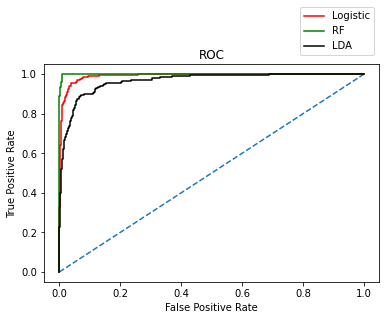

In [195]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_train_fpr, logistic_train_tpr,color='red',label="Logistic")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(lda_train_fpr,lda_train_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

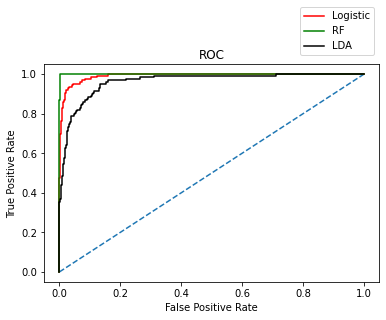

In [196]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(logistic_test_fpr, logistic_test_tpr,color='red',label="Logistic")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(lda_test_fpr,lda_test_tpr,color='black',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [197]:
stock_prices = pd.read_csv('Market+Risk+Dataset.csv')


stock_prices.head()

,Date,Infosys,Indian Hotel,Mahindra & Mahindra,Axis Bank,SAIL,Shree Cement,Sun Pharma,Jindal Steel,Idea Vodafone,Jet Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [198]:
stock_prices.columns = stock_prices.columns.str.replace(' ', '_')

In [199]:
stock_prices.head()

,Date,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,31-03-2014,264,69,455,263,68,5543,555,298,83,278
1,07-04-2014,257,68,458,276,70,5728,610,279,84,303
2,14-04-2014,254,68,454,270,68,5649,607,279,83,280
3,21-04-2014,253,68,488,283,68,5692,604,274,83,282
4,28-04-2014,256,65,482,282,63,5582,611,238,79,243


In [200]:
print('The number of rows (observations) is',stock_prices.shape[0],'\n''The number of columns (variables) is',stock_prices.shape[1])

The number of rows (observations) is 314 
The number of columns (variables) is 11


In [201]:
stock_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 314 non-null    object
 1   Infosys              314 non-null    int64 
 2   Indian_Hotel         314 non-null    int64 
 3   Mahindra_&_Mahindra  314 non-null    int64 
 4   Axis_Bank            314 non-null    int64 
 5   SAIL                 314 non-null    int64 
 6   Shree_Cement         314 non-null    int64 
 7   Sun_Pharma           314 non-null    int64 
 8   Jindal_Steel         314 non-null    int64 
 9   Idea_Vodafone        314 non-null    int64 
 10  Jet_Airways          314 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 27.1+ KB


In [202]:
stock_prices.isnull().sum()

Date                   0
Infosys                0
Indian_Hotel           0
Mahindra_&_Mahindra    0
Axis_Bank              0
SAIL                   0
Shree_Cement           0
Sun_Pharma             0
Jindal_Steel           0
Idea_Vodafone          0
Jet_Airways            0
dtype: int64

In [203]:
stock_prices.duplicated().sum()

0

In [204]:
stock_prices.describe()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
count,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00,314.00
mean,511.34,114.56,636.68,540.74,59.10,14806.41,633.47,147.63,53.71,372.66
std,135.95,22.51,102.88,115.84,15.81,4288.28,171.86,65.88,31.25,202.26
min,234.00,64.00,284.00,263.00,21.00,5543.00,338.00,53.00,3.00,14.00
25%,424.00,96.00,572.00,470.50,47.00,10952.25,478.50,88.25,25.25,243.25
50%,466.50,115.00,625.00,528.00,57.00,16018.50,614.00,142.50,53.00,376.00
75%,630.75,134.00,678.00,605.25,71.75,17773.25,785.00,182.75,82.00,534.00
max,810.00,157.00,956.00,808.00,104.00,24806.00,1089.00,338.00,117.00,871.00


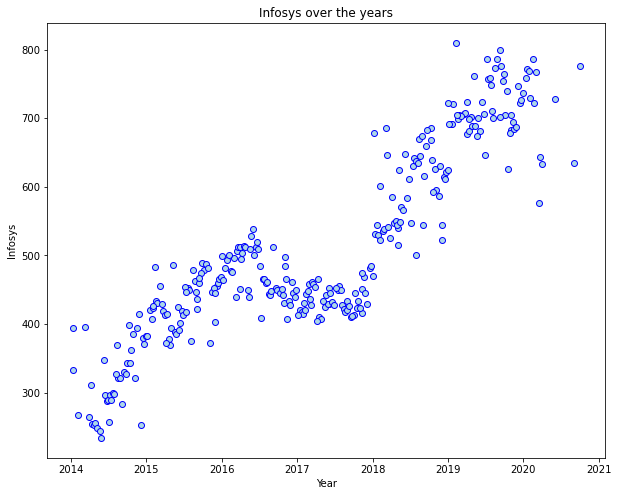

In [205]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Infosys'], edgecolors='b', color = 'lightblue')
plt.xlabel('Year')
plt.ylabel('Infosys')
plt.title('Infosys over the years')
plt.show()

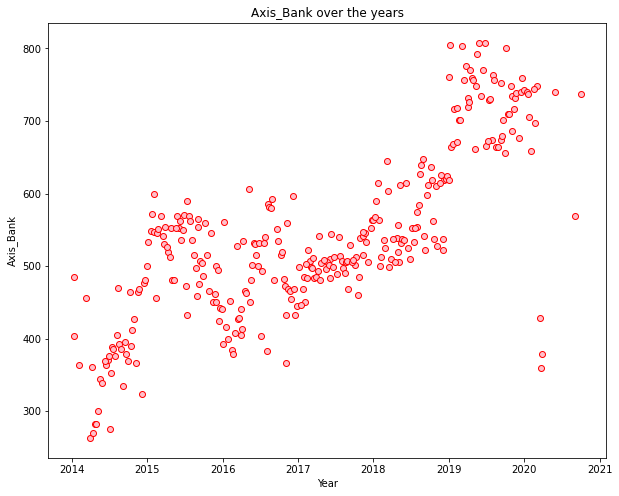

In [206]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Axis_Bank'], edgecolors='r', color = 'pink')
plt.xlabel('Year')
plt.ylabel('Axis_Bank')
plt.title('Axis_Bank over the years')
plt.show()

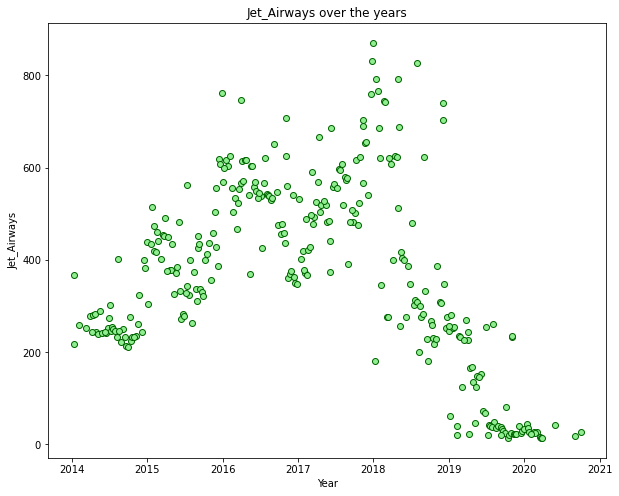

In [207]:
plt.figure(figsize = (10, 8))
stock_prices['dates'] = [pd.to_datetime(d) for d in stock_prices['Date']]
plt.scatter(stock_prices['dates'], stock_prices['Jet_Airways'], edgecolors='darkgreen', color = 'lightgreen')
plt.xlabel('Year')
plt.ylabel('Jet_Airways')
plt.title('Jet_Airways over the years')

plt.show()

In [208]:
stock_returns = np.log(stock_prices.drop(['Date','dates'],axis=1)).diff(axis = 0, periods = 1) 

In [209]:
stock_returns.shape

(314, 10)

In [210]:
stock_returns.head()

,Infosys,Indian_Hotel,Mahindra_&_Mahindra,Axis_Bank,SAIL,Shree_Cement,Sun_Pharma,Jindal_Steel,Idea_Vodafone,Jet_Airways
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.03,-0.01,0.01,0.05,0.03,0.03,0.09,-0.07,0.01,0.09
2,-0.01,0.00,-0.01,-0.02,-0.03,-0.01,-0.00,0.00,-0.01,-0.08
3,-0.00,0.00,0.07,0.05,0.00,0.01,-0.00,-0.02,0.00,0.01
4,0.01,-0.05,-0.01,-0.00,-0.08,-0.02,0.01,-0.14,-0.05,-0.15


In [211]:
stock_means = stock_returns.mean(axis = 0)
stock_means

Infosys                0.00
Indian_Hotel           0.00
Mahindra_&_Mahindra   -0.00
Axis_Bank              0.00
SAIL                  -0.00
Shree_Cement           0.00
Sun_Pharma            -0.00
Jindal_Steel          -0.00
Idea_Vodafone         -0.01
Jet_Airways           -0.01
dtype: float64

In [212]:
stock_sd = stock_returns.std(axis = 0)
stock_sd

Infosys               0.04
Indian_Hotel          0.05
Mahindra_&_Mahindra   0.04
Axis_Bank             0.05
SAIL                  0.06
Shree_Cement          0.04
Sun_Pharma            0.05
Jindal_Steel          0.08
Idea_Vodafone         0.10
Jet_Airways           0.10
dtype: float64

In [213]:
df = pd.DataFrame({'Average':stock_means, 'Volatility': stock_sd})
df

,Average,Volatility
Infosys,0.00,0.04
Indian_Hotel,0.00,0.05
Mahindra_&_Mahindra,-0.00,0.04
Axis_Bank,0.00,0.05
SAIL,-0.00,0.06
Shree_Cement,0.00,0.04
Sun_Pharma,-0.00,0.05
Jindal_Steel,-0.00,0.08
Idea_Vodafone,-0.01,0.10
Jet_Airways,-0.01,0.10


In [216]:
df.sort_values(by=['Average'],ascending=False)

,Average,Volatility
Shree_Cement,0.00,0.04
Infosys,0.00,0.04
Axis_Bank,0.00,0.05
Indian_Hotel,0.00,0.05
Sun_Pharma,-0.00,0.05
Mahindra_&_Mahindra,-0.00,0.04
SAIL,-0.00,0.06
Jindal_Steel,-0.00,0.08
Jet_Airways,-0.01,0.10
Idea_Vodafone,-0.01,0.10


In [217]:
df.sort_values(by=['Volatility'],ascending=False)

,Average,Volatility
Idea_Vodafone,-0.01,0.10
Jet_Airways,-0.01,0.10
Jindal_Steel,-0.00,0.08
SAIL,-0.00,0.06
Indian_Hotel,0.00,0.05
Axis_Bank,0.00,0.05
Sun_Pharma,-0.00,0.05
Mahindra_&_Mahindra,-0.00,0.04
Shree_Cement,0.00,0.04
Infosys,0.00,0.04


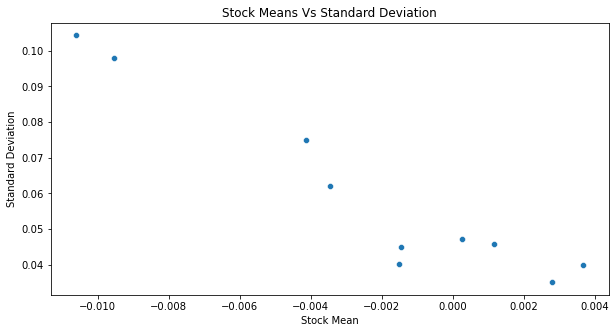

In [214]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['Average'],df['Volatility'],palette="deep")
plt.ylabel("Standard Deviation")
plt.xlabel("Stock Mean")
plt.title("Stock Means Vs Standard Deviation")
plt.show()

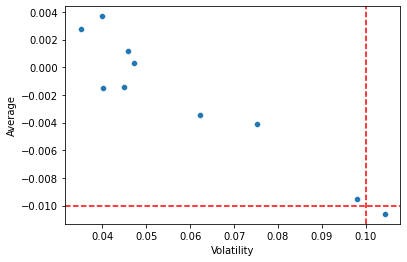

In [245]:
plot = sns.scatterplot(df['Volatility'], df['Average'])
plot.axvline(x=0.10,linestyle='--', color = "red")
plot.axhline(y=-0.01,linestyle='--', color = "red")
plt.show()

In [246]:
df.loc['Jet_Airways'][0]

-0.009548127105672136

In [247]:
df[df['Average'] > df.loc['Jet_Airways'][0]].sort_values(by = 'Volatility')

,Average,Volatility
Infosys,0.00,0.04
Shree_Cement,0.00,0.04
Mahindra_&_Mahindra,-0.00,0.04
Sun_Pharma,-0.00,0.05
Axis_Bank,0.00,0.05
Indian_Hotel,0.00,0.05
SAIL,-0.00,0.06
Jindal_Steel,-0.00,0.08
